## Normalizacja danych
### Czym jest norma?
Jest to funkcja || spełniająca określone właściwości dotyczące skalowalności i addytywności oraz przypisująca ściśle dodatnią liczbę rzeczywistą każdemu wektorowi w zdefiniowanej przestrzeni wektorowej. Szczególnym przypadkiem jest wektor zerowy, któremu jest przypisana wartość $0$.

W najprostszych słowach **norma** to długość wektora w danej przestrzeni.

W jednowymiarowej przestrzeni $||x||_1=||x||_2=\cdots=||x||_p=|x|$

Przykłady norm dla wektora $x \in \mathbb{R}^3, x = (x_1,x_2,x_3)$:
- $||x||_1 = |x_1|^1+|x_2|^1+|x_3|^1$
- $||x||_2 = (|x_1|^2+|x_2|^2+|x_2|^2)^{\frac{1}{2}} = \sqrt{(x_1^2+x_2^2+x_2^2)}$
- ...
- $||x||_p = |x_1|^{\frac{1}{p}}+|x_2|^{\frac{1}{p}}+|x_2|^{\frac{1}{p}}$
- $||x||_\infty = \max(|x_1|,|x_2|,|x_3|)$

### Przykład dla danych tabularycznych

In [15]:
import numpy as np
x = np.array([[2,2,3,100],[2,2,3,200],[2,2,3,300]])
x

array([[  2,   2,   3, 100],
       [  2,   2,   3, 200],
       [  2,   2,   3, 300]])

In [16]:
l1_norm = preprocessing.normalize(x, norm = 'l1')
l1_norm

array([[0.01869159, 0.01869159, 0.02803738, 0.93457944],
       [0.00966184, 0.00966184, 0.01449275, 0.96618357],
       [0.00651466, 0.00651466, 0.00977199, 0.9771987 ]])

In [17]:
l1_norm.sum(axis=1)

array([1., 1., 1.])

In [18]:
l2_norm = preprocessing.normalize(x, norm = 'l2')
l2_norm

array([[0.01998302, 0.01998302, 0.02997453, 0.99915108],
       [0.00999788, 0.00999788, 0.01499681, 0.99978757],
       [0.00666604, 0.00666604, 0.00999906, 0.99990557]])

In [19]:
l2_norm.sum(axis=1)

array([1.06909166, 1.03478013, 1.0232367 ])

In [20]:
max_norm = preprocessing.normalize(x, norm = 'max')
max_norm

array([[0.02      , 0.02      , 0.03      , 1.        ],
       [0.01      , 0.01      , 0.015     , 1.        ],
       [0.00666667, 0.00666667, 0.01      , 1.        ]])

In [21]:
max_norm.sum(axis=1)

array([1.07      , 1.035     , 1.02333333])

### Po co wykonujemy normalizacje? 
### Jakie zmienia się nasz wektor i jakie wartości może przyjąć?
### Czym różni się normalizacja od standaryzacji?
Standaryzacja zmiennej x dla przypomnienia: $z = \frac{(x - mean(x))}{std(x)}$

## Klasyfikacja 
Klasyfikacja to rodzaj algorytmu statystycznego, który przydziela obserwacje statystyczne do klas, bazując na atrybutach tych obserwacji.

**Definicja:**
Dla danego zbioru danych trenujących $\{(x_1,y),\ldots,(x_n,y)\}$ algorytm potrafi znaleźć funkcję klasyfikującją $h: X -> Y$, która przydziela obiektowi $x\in X$ klasę $y \in Y$.

- prawdopodobieństwo aposteriori: $P(Y=i|X)$
- funkcja klasyfikacyjna przyjmuje postać: $h(X) = argmax_{1,\ldots,y} P(Y=i|X)$

Przykłady klasyfikacji:
- wykrywanie czy pacjent jest chory na daną chorobę na podstawie wyników badań
- klasyfikacja maili jako spam/nie-spam
- czy transakcja dokonana na koncie klienta banku to oszustwo/kradzież czy też normalna transakcja
- rozpoznawania na obrazu różnych rodzajów zwierząt
- rozpoznawanie czy pasażer przeżyje katastrofę na titanicu

Na potrzeby uproszczenia wyjaśniania w dalszej części labów, skupimy się tylko na klasyfikacji binarnej!

Zajmiemy się zbiorem gdzie klasyfikujemy u pacjentów czy występuje choroba serca czy nie.

In [53]:
import pandas as pd
np.random.seed = 42

In [54]:
data = pd.read_csv('heart.csv')
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [55]:
# Szybko sprawdzamy podstawowe cechy danych
na_ratio_cols = data.isna().mean(axis=0)
na_ratio_cols

sbp          0.0
tobacco      0.0
ldl          0.0
adiposity    0.0
famhist      0.0
typea        0.0
obesity      0.0
alcohol      0.0
age          0.0
chd          0.0
dtype: float64

In [58]:
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49


#### Szybkie ćwiczenie - wykonaj dowolne kodowanie zmiennej kategorycznej

In [63]:

data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [67]:
y = np.array(data['chd'])
X = data.drop(['chd'],axis=1)

In [68]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

### Jaki znacie najprostszy klasyfikator?

In [69]:
from sklearn.dummy import DummyClassifier

In [70]:
dc = DummyClassifier(strategy='uniform', random_state=42)
dc.fit(X,y)
y_proba = dc.predict_proba(X)
y_hat = dc.predict(X)
print("proba: " + str(y_proba[0:10,0]) + '\ny:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y[0:10]))

proba: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
y:     [0 1 0 0 0 1 0 0 0 1]
y_hat: [1 1 0 1 1 0 0 1 0 1]


- Jakieś inne proste klasyfikatory?

## Regresja logistyczna - czemu by nie prognozować prawdopodobieństwa za pomocą regresji liniowej?

**Przypomnienie:** uogólniony model liniowy: $y_{i}=\beta _{0}1+\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip} = x^T \beta$

- Jaki jest podstawowy problem z wykorzystaniem regresji do modelowania prawdopodobieństwa?
- Jakie macie propozycje rozwiązania tego problemu?

$odds = \frac{P(Y=1|X)}{P(Y=0|X)} = \frac{p}{1-p}$ $\in (0,1)$

$\log({odds}) \in (-\infty, \infty)$

Co pozwala nam modelować powyższe równanie dzięki regresji liniowej, po przekształceniu równania, uzyskujemy prawdopodobieństwo sukcesu:

$x^T \beta = \log({\frac{p}{1-p}}) \Rightarrow p = \frac{1}{1-\exp({x^T \beta})}$

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

lr.fit(X,y)
y_hat = lr.predict(X)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y[0:10]))

y:     [1 0 0 1 1 1 0 1 0 1]
y_hat: [1 1 0 1 1 0 0 1 0 1]


- Jakie są zalety regresji logistycznej?

## Drzewo decyzyjne
- Jak wykorzystać model drzewa do predykcji klasyfikacji/regresji?
- jakie problemy może to generować?

y:     [1 1 0 1 1 0 0 1 0 1]
y_hat: [1 1 0 1 1 0 0 1 0 1]


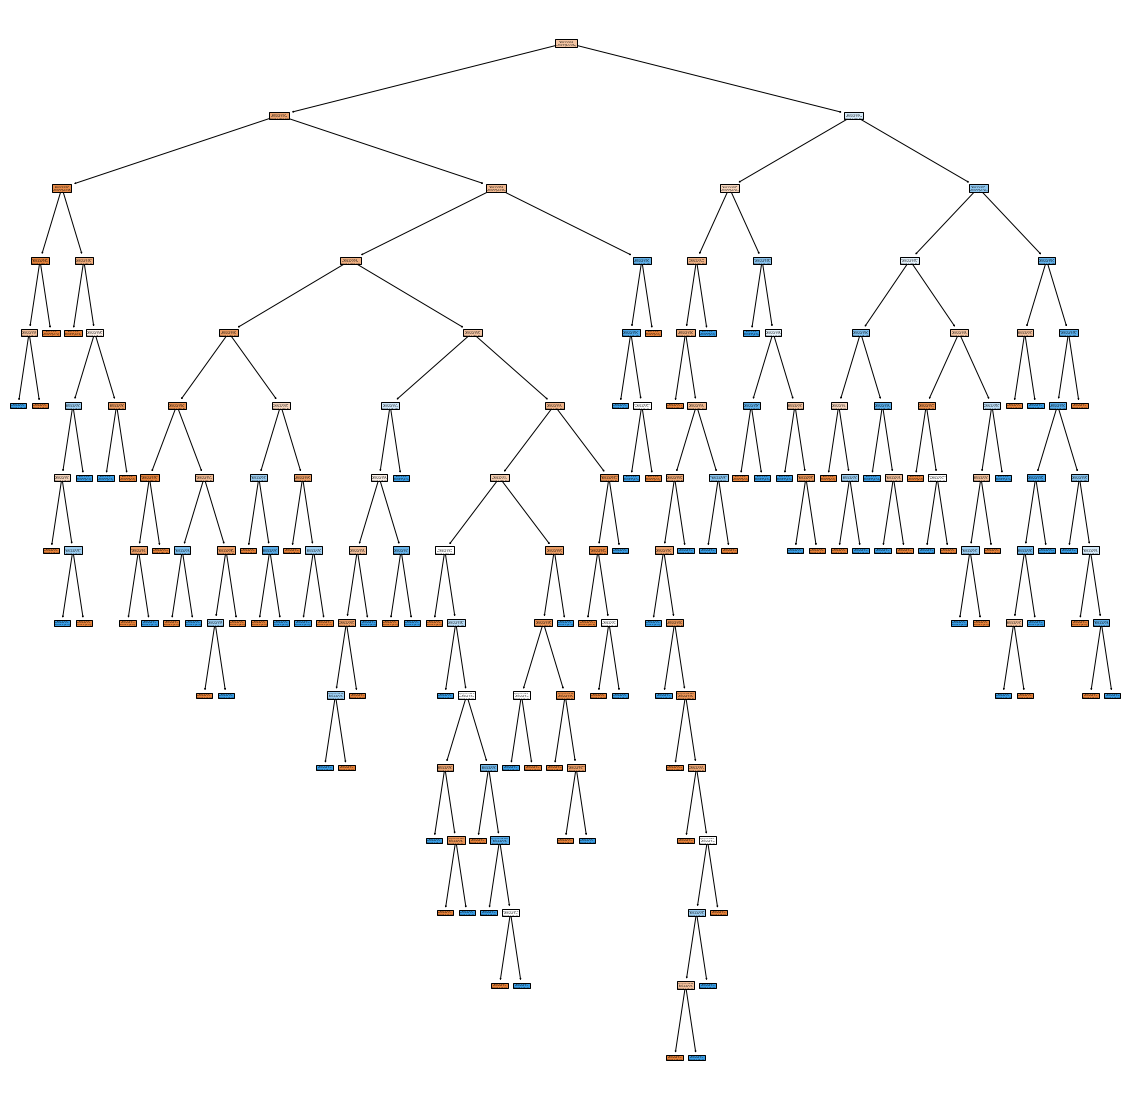

In [77]:
from sklearn.tree import DecisionTreeClassifier,plot_tree #export_graphviz
import graphviz

tree1 = DecisionTreeClassifier()

tree1.fit(X,y)
y_hat = tree1.predict(X)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y[0:10]))

plt.figure(figsize=(20,20))
splits=tree.plot_tree(tree1, filled=True)

## SVM
Znalezienie równania hiperpłaszczyzny, która najlepiej dzieli nasz zbiór danych na klasy
- Co jeżeli nie istnieje taka płaszczyzna?
- Co jeżeli nasze dane nie są separowalne liniowo, tylko np. radialnie?

In [102]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(X,y)
y_hat = svm.predict(X)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y[0:10]))

y:     [0 0 0 0 0 0 0 0 0 0]
y_hat: [1 1 0 1 1 0 0 1 0 1]


- Jakie widzicie wady/zalety tego algorytmu?

## Naiwny Klasyfikator Bayesowski
Jest oparty na założeniu o wzajemnej niezależności zmiennych. Często nie mają one żadnego związku z rzeczywistością i właśnie z tego powodu nazywa się je naiwnymi.

In [109]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X,y)
y_hat = nb.predict(X)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y[0:10]))

y:     [1 0 0 1 1 1 0 0 0 1]
y_hat: [1 1 0 1 1 0 0 1 0 1]


- Jakie widzicie wady/zalety tego algorytmu?

## Sposoby podziału danych
- Jak radzić sobie z overfitingiem?
- Jakie znacie sposoby podziału danych na treningowe i testowe?

### Zbiór treningowy i testowy
Prosty podział danych na część, na której uczymy model i na część która służy nam do sprawdzenia jego skuteczności.

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
print(X.shape,X_train.shape,X_test.shape)

(462, 9) (369, 9) (93, 9)


**Szybkie zadanie:** Podzielić dane w taki sposób jak powyżej i nauczyć na zbiorze treningowym regresje logistyczną

- Jakie widzicie wady podejścia train/test split?

### Crossvalidation
- Czy możemy stosować CV dzieląc zbiór, tak by w zbiorze walidacyjnym pozostała tylko jedna obserwacja danych?
- Czy sprawdzając performance modelu przez CV, możemy potem nauczyć model na całym zbiorze danych?

In [116]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, scoring='accuracy', cv = 10)

array([0.78723404, 0.68085106, 0.73913043, 0.67391304, 0.58695652,
       0.76086957, 0.76086957, 0.65217391, 0.7826087 , 0.7826087 ])

## Miary ocen jakości klasyfikatorów
- Jakie znacie miary oceny klasyfikatorów?

### Accuracy
$ACC = \frac{TP+TN}{ALL}$

Bardzo intuicyjna miara - ile obserwacji zakwalifikowaliśmy poprawnie.

- Jaki jest problem z accuracy?

### Precision & Recall
$PRECISION = \frac{TP}{TP+FP}= \frac{TP}{\text{TOTAL PREDICTED POSITIVE}}$

$RECALL = \frac{TP}{TP+FN}$

### F1 Score
$F1_SCORE =\frac{2*PRECISION*RECALL}{PRECISION+RECALL}$

### ROC AUC

**Zadanie** - przetestować 3 modele przedstawione dziś na zajęciach i sprawdzić, który jest lepszy na podstawie wyżej wymienionych miar.